In [21]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
apple = pd.read_csv("apple_products.csv")
apple.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [23]:
apple.shape

(62, 11)

In [24]:
apple.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [25]:
apple.duplicated().sum()

0

In [26]:
apple.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [27]:
apple.columns

Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')

#### I phone sales analysis for india


In [36]:
# Top 10 iphone based on star rating 
highest_rating = apple.sort_values(by=["Star Rating"], ascending = False)
top_10_iphone = highest_rating.head(10)
top_10_iphone['Product Name']

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object

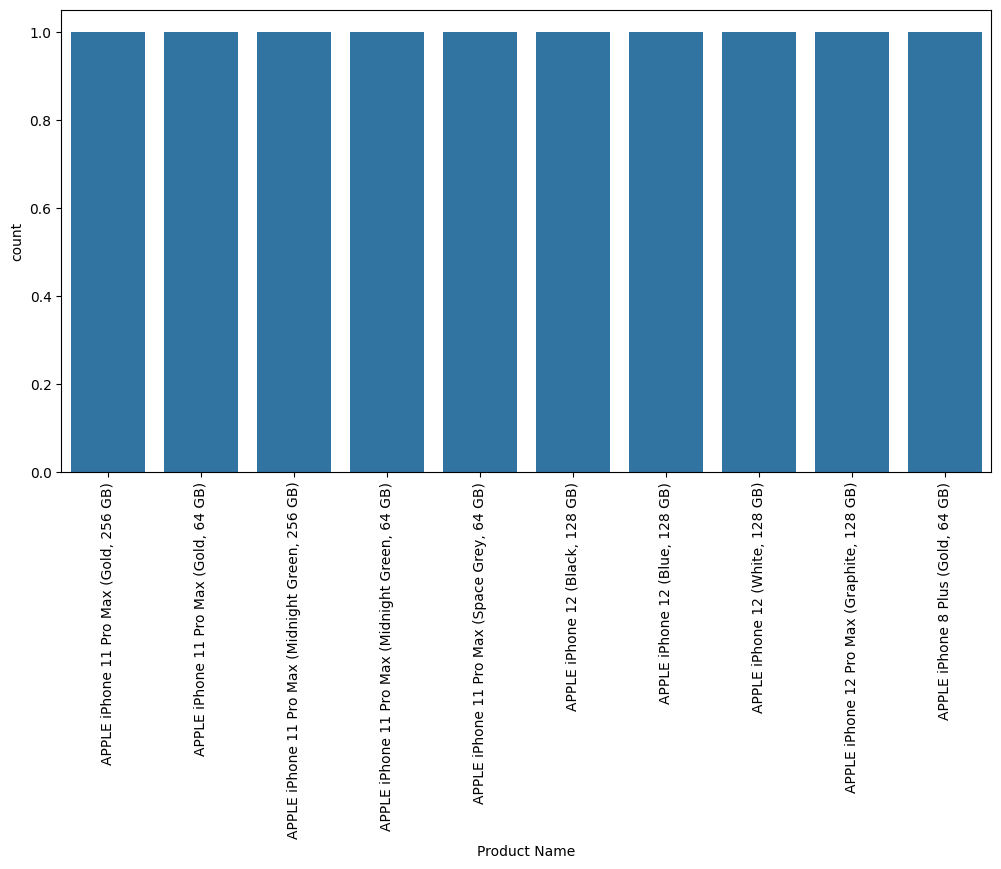

In [37]:
plt.figure(figsize=(12,6))
highest_rated_products = top_10_iphone.groupby(['Product Name'], as_index=False).value_counts().sort_values(by="Star Rating", ascending= False)

product_plot = sns.countplot(x= "Product Name", data= highest_rated_products)
plt.xticks(rotation= 90)
plt.show()


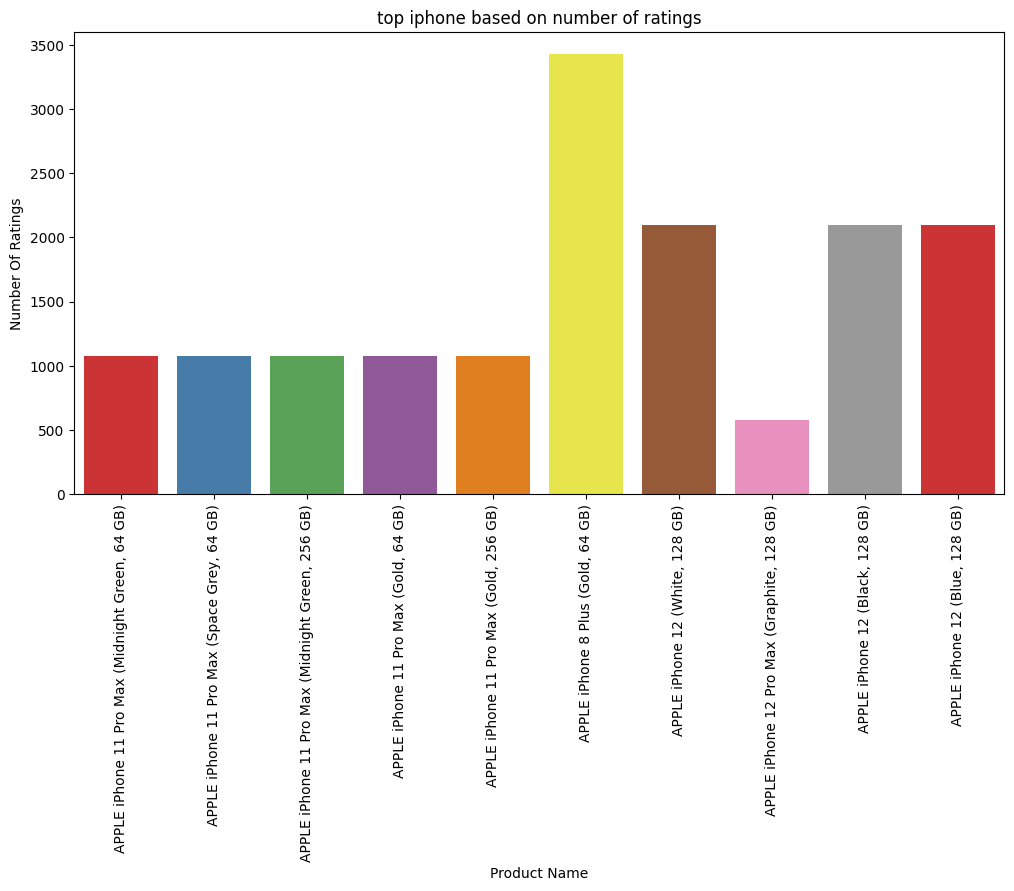

In [48]:
iphone = top_10_iphone['Product Name'].value_counts()
labels = iphone.index
counts = top_10_iphone['Number Of Ratings']

plt.figure(figsize=(12,6))
sns.barplot(x= labels,y= counts,data= top_10_iphone,palette="Set1")
plt.title("top iphone based on number of ratings")
plt.xticks(rotation= 90)
plt.show()

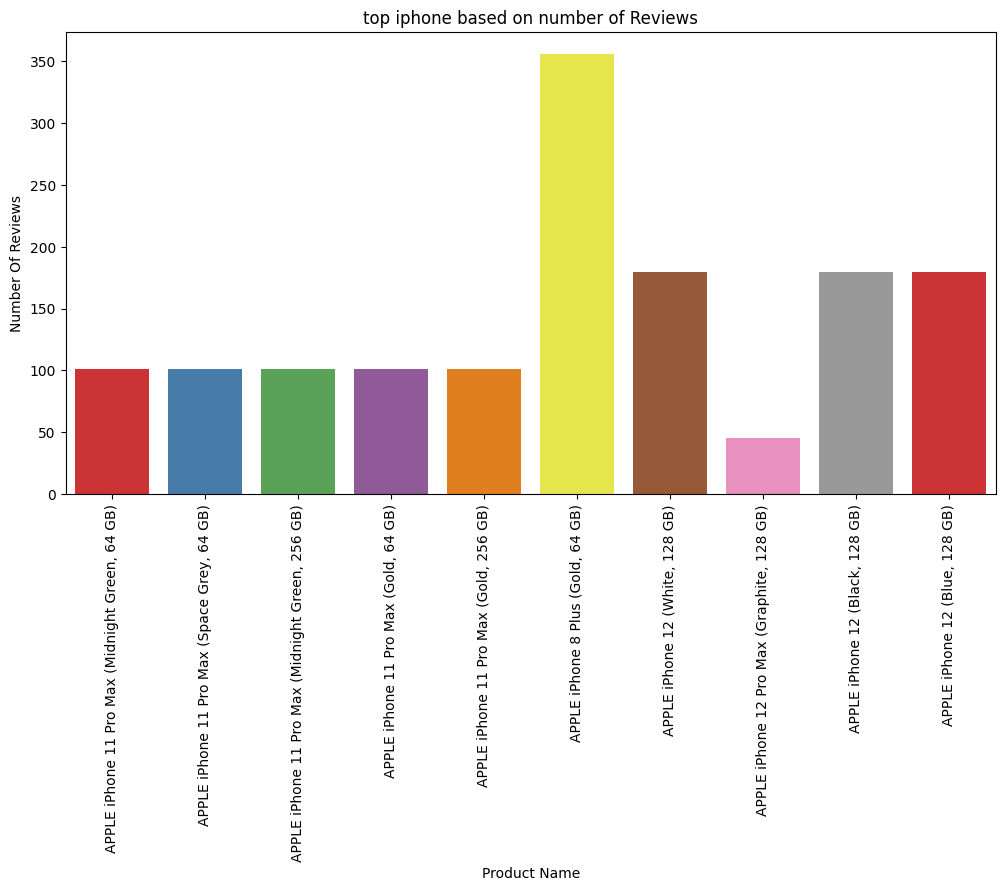

In [50]:
iphone = top_10_iphone['Product Name'].value_counts()
labels = iphone.index
counts = top_10_iphone['Number Of Reviews']

plt.figure(figsize=(12,6))
sns.barplot(x= labels,y= counts,data= top_10_iphone,palette="Set1")
plt.title("top iphone based on number of Reviews")
plt.xticks(rotation= 90)
plt.show()

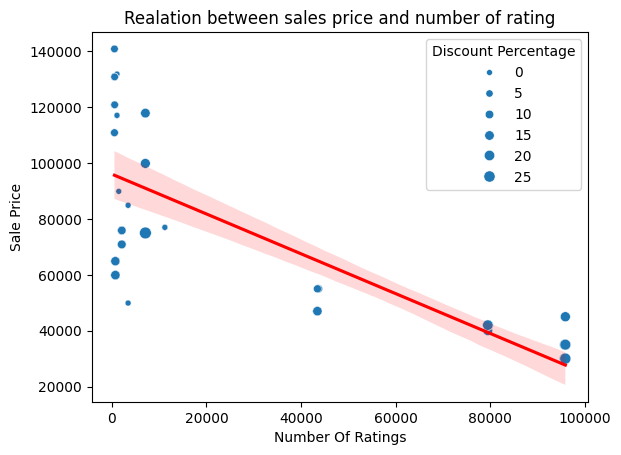

In [58]:
sns.scatterplot(x= apple['Number Of Ratings'],y= apple['Sale Price'], data=apple, size= apple['Discount Percentage'])
plt.title("Realation between sales price and number of rating")
sns.regplot(x= "Number Of Ratings",y= "Sale Price",data=apple,scatter=False,color="red")
plt.show()

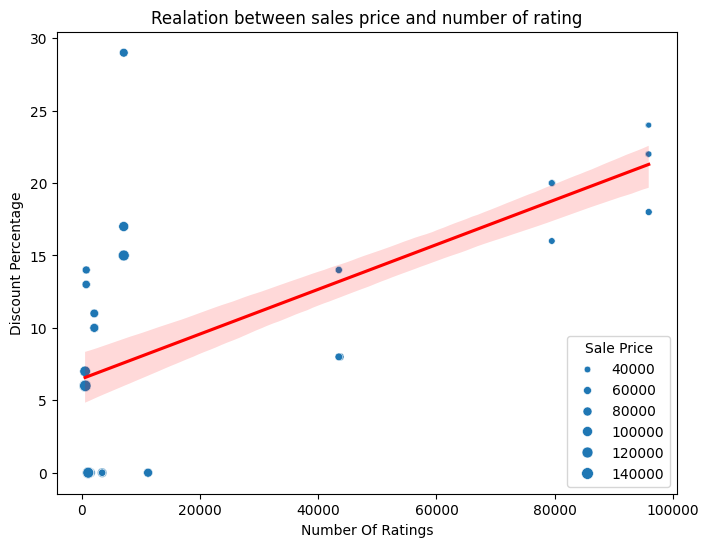

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= apple['Number Of Ratings'],y= apple['Discount Percentage'], data=apple, size= apple['Sale Price'])
plt.title("Realation between sales price and number of rating")
sns.regplot(x= "Number Of Ratings",y= "Discount Percentage",data=apple,scatter=False,color="red")
plt.show()

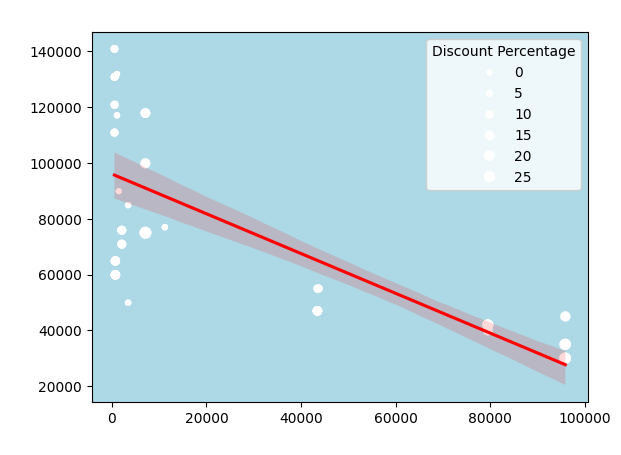

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a black background figure
plt.figure(facecolor='white')

# Creating scatter plot
sales = sns.scatterplot(x=apple['Number Of Ratings'], y=apple['Sale Price'], data=apple, size=apple['Discount Percentage'], color='white')
plt.title("Relation between sales price and number of ratings", color='white')
plt.xlabel("Number of Ratings", color='white')
plt.ylabel("Sale Price", color='white')

# Adding regression line
sns.regplot(x="Number Of Ratings", y="Sale Price", data=apple, scatter=False, color="red")



# Setting background color of plotting area to black
sales.set_facecolor('lightblue')

plt.show()
